##### Copyright 2025 Google LLC.

In [2]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [3]:
%pip install -U -q 'google-genai>=1.0.0'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 9.4 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [4]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [5]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GEMINI_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [6]:
MODEL_ID = "gemini-2.5-flash" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash", "gemini-2.5-pro"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [7]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [8]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

sdk_http_response=HttpResponse(
  headers=<dict len=10>
) total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [9]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

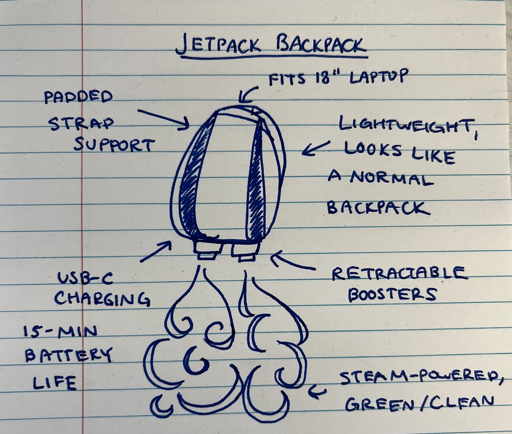

## Your Next Commute: Is It By Jetpack?

Ever gazed longingly at the sky while stuck in bumper-to-bumper traffic, wishing you could just... fly over it all? Well, a recent concept sketch floating around might just be the answer to our collective urban transportation woes: the "Jetpack Backpack"!

At first glance, this ingenious contraption looks like, well, a normal backpack. And that's part of its brilliance! Designed to be lightweight and equipped with padded strap support, it even boasts enough space to comfortably fit an 18-inch laptop. So, it's a perfectly functional everyday carry for your books, gadgets, and... personal flight system.

But here's where it gets exciting: tucked away at the bottom are *retractable boosters*. Yes, you read that right. This isn't just any bag; it's a personal flight device! And for the eco-conscious among us, get this: it's conceptualized as "steam-powered," promising a "green/clean" mode of propulsion. Talk about futuristic and responsible!

Now, let's address the elephant in the room – the battery life. The sketch indicates a 15-minute battery life, with convenient USB-C charging. While that might not get you cross-country, imagine the possibilities for quick hops over congested areas, bypassing those frustrating last-mile commutes, or just making a grand entrance (or exit!).

While still a concept, the "Jetpack Backpack" sparks the imagination. Could this be the beginning of a whole new era of personal, eco-friendly urban mobility? What do you think – would you strap one on for your morning commute?

In [10]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/prompting-strategies#model-parameters).

In [11]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

Okay, listen up, pup! *Wag-wag-wag!*

You know how you have a favorite squeaky toy? *SQUEAK!* And you want to play with it?

Well, the internet is like... a **GIANT, SUPER-DUPER PILE OF ALL THE SQUEAKY TOYS IN THE WHOLE WIDE WORLD!** *Woof!*

1.  **You want a squeak!** (That's you wanting to see a picture of a squirrel, or hear a song about bones!) Your little paw goes *boop* on the shiny thing (that's your computer or phone). That's like asking for a special squeak!

2.  **That little squeak-wish zooms down a long, long, *long* chew toy!** (That's the wire, or cable, that connects your shiny thing to the big world of squeaks!) Or sometimes, it just *floats* through the air, like a yummy smell! (That's Wi-Fi!)

3.  **Where does it go?** To a **GIANT, SUPER-DUPER PILE OF ALL THE SQUEAKY TOYS IN THE WHOLE WIDE WORLD!** (These are like big dog houses full of squeaky toys, called "servers"!)

4.  **This big pile of toys, it hears your little squeak-wish.** It finds *just* the right squeak you wanted! (Like finding the *exact* squeaky duck you love!)

5.  **And *WHOOSH*! It sends that squeak right back!** Down the long chew toy, or floating through the air... right to your ear! *SQUEAK!* You got it!

So, the internet is just lots and lots of squeaks, zooming around, back and forth, from you to the giant toy pile, and back again! All the time! *WOOF!* Now, go get that squeaky ball! *SQUEAK!*

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [12]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two disrespectful things you might say to the universe after stubbing your toe in the dark:

1.  "Oh, *real* original, universe. Is that the best you've got? You couldn't even manage a *real* disaster, just a cheap shot in the dark?"
2.  "Congratulations, universe, you successfully made a tiny, pointless pain. Are you *proud* of that? Did you think I wouldn't notice your grand design behind *this*?"

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [13]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [14]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

You can check if a year is a leap year by following these rules:

1.  A year is a leap year if it is divisible by 4.
2.  However, if the year is divisible by 100, it is **not** a leap year, unless...
3.  The year is also divisible by 400, in which case it **is** a leap year.

This can be summarized as:
`(year % 4 == 0 AND year % 100 != 0) OR (year % 400 == 0)`

Here are implementations in Python and C#:

---

## Python

```python
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year according to the Gregorian calendar rules.

    Args:
        year: The year to check (e.g., 2000, 1900, 2024).

    Returns:
        True if the year is a leap year, False otherwise.
    """
    # Rule 1: Divisible by 4
    # Rule 2: Not divisible by 100, unless...
    # Rule 3: Divisible by 400
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# --- Examples ---
print(f"Is 2000 a leap year? {is_leap_year(2000)}")  # True (divisible by 400)
print(f"Is 1900 a leap year? {is_leap_year(1900)}")  # False (divisible by 100, but not by 400)
print(f"Is 2024 a leap year? {is_leap_year(2024)}")  # True (divisible by 4, not by 100)
print(f"Is 2023 a leap year? {is_leap_year(2023)}")  # False (not divisible by 4)
print(f"Is 1600 a leap year? {is_leap_year(1600)}")  # True (divisible by 400)
```

### Explanation for Python:

The `is_leap_year` function takes an integer `year` as input.
It returns `True` if:
*   The `year` is divisible by 4 AND not divisible by 100 (e.g., 2004, 2008).
*   OR the `year` is divisible by 400 (e.g., 2000, 2400).

Otherwise, it returns `False`.

---

## C#

```csharp
using System;

public static class DateTimeUtils
{
    /// <summary>
    /// Checks if a given year is a leap year according to the Gregorian calendar rules.
    /// </summary>
    /// <param name="year">The year to check (e.g., 2000, 1900, 2024).</param>
    /// <returns>True if the year is a leap year, False otherwise.</returns>
    public static bool IsLeapYear(int year)
    {
        // A year is a leap year if it is divisible by 4,
        // but not by 100, unless it is also divisible by 400.
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }

    public static void Main(string[] args)
    {
        // --- Examples ---
        Console.WriteLine($"Is 2000 a leap year? {IsLeapYear(2000)}");  // True
        Console.WriteLine($"Is 1900 a leap year? {IsLeapYear(1900)}");  // False
        Console.WriteLine($"Is 2024 a leap year? {IsLeapYear(2024)}");  // True
        Console.WriteLine($"Is 2023 a leap year? {IsLeapYear(2023)}");  // False
        Console.WriteLine($"Is 1600 a leap year? {IsLeapYear(1600)}");  // True

        // C# also has a built-in method:
        Console.WriteLine($"\nUsing built-in .NET method:");
        Console.WriteLine($"Is 2000 a leap year (built-in)? {DateTime.IsLeapYear(2000)}");
        Console.WriteLine($"Is 1900 a leap year (built-in)? {DateTime.IsLeapYear(1900)}");
    }
}
```

### Explanation for C#:

The C# `IsLeapYear` method implements the exact same logic as the Python version. It uses the modulo operator (`%`) to check for divisibility.

Note that .NET's `System.DateTime` struct also provides a static method `DateTime.IsLeapYear(int year)` which you can use directly for this purpose in C#. The provided custom function is useful for understanding the underlying logic or for environments where such a built-in function is not available.

Here's another example using your new helpful coding assistant:

In [15]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Absolutely! Writing unit tests is a crucial step to ensure your code works as expected and remains robust after future changes.

We'll use `pytest` for Python (a very popular and easy-to-use testing framework) and `xUnit.net` for C# (a common choice in the .NET ecosystem).

---

## Python Unit Test (using `pytest`)

First, ensure you have `pytest` installed:
`pip install pytest`

Then, create two files:
1.  `leap_year_checker.py` (containing your function)
2.  `test_leap_year.py` (containing your tests)

**1. `leap_year_checker.py`**
(This is your function from the previous response)

```python
# leap_year_checker.py

def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year according to the Gregorian calendar rules.

    Args:
        year: The year to check (e.g., 2000, 1900, 2024).

    Returns:
        True if the year is a leap year, False otherwise.
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

```

**2. `test_leap_year.py`**
(Your unit tests)

```python
# test_leap_year.py

import pytest
from leap_year_checker import is_leap_year # Import the function to be tested

@pytest.mark.parametrize("year, expected", [
    # --- Leap Years ---
    (2000, True),  # Rule 3: Divisible by 400 (e.g., 2000, 1600)
    (1600, True),  # Divisible by 400
    (2400, True),  # Divisible by 400

    (2024, True),  # Rule 1: Divisible by 4 AND Rule 2: NOT divisible by 100 (e.g., 2024, 2008)
    (2008, True),
    (1996, True),

    # --- Non-Leap Years ---
    (1900, False), # Rule 2 Exception: Divisible by 100 but NOT by 400 (e.g., 1900, 2100)
    (2100, False),
    (1800, False),

    (2023, False), # Rule 1 Violation: Not divisible by 4 (e.g., 2023, 2021)
    (2021, False),
    (1999, False),

    # Edge cases / other examples
    (1, False),
    (4, True),
    (100, False),
    (400, True),
])
def test_is_leap_year(year: int, expected: bool):
    """
    Tests the is_leap_year function with various year inputs to cover all leap year rules.
    """
    actual = is_leap_year(year)
    assert actual == expected, f"For year {year}, expected {expected} but got {actual}"

```

**How to run the Python tests:**

1.  Navigate to the directory containing both `leap_year_checker.py` and `test_leap_year.py` in your terminal.
2.  Run the command: `pytest`

You should see output indicating that all tests passed.

---

## C# Unit Test (using `xUnit.net`)

For C#, you typically create a separate **Test Project** in your solution.

**1. Your Library Project** (e.g., `MyDateUtils`)
This project contains your `DateTimeUtils` class.

```csharp
// In your library project (e.g., MyDateUtils/DateTimeUtils.cs)
using System;

namespace MyDateUtils // Or whatever namespace your utility class is in
{
    public static class DateTimeUtils
    {
        /// <summary>
        /// Checks if a given year is a leap year according to the Gregorian calendar rules.
        /// </summary>
        /// <param name="year">The year to check (e.g., 2000, 1900, 2024).</param>
        /// <returns>True if the year is a leap year, False otherwise.</returns>
        public static bool IsLeapYear(int year)
        {
            return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
        }
    }
}
```

**2. Your Test Project** (e.g., `MyDateUtils.Tests`)

First, create a new xUnit Test Project in Visual Studio or via `dotnet CLI`:
`dotnet new xunit -n MyDateUtils.Tests`

Then, add a project reference from your `MyDateUtils.Tests` project to your `MyDateUtils` project:
`dotnet add MyDateUtils.Tests reference MyDateUtils`

Now, add the test class file (e.g., `LeapYearTests.cs`) to your `MyDateUtils.Tests` project:

```csharp
// In your test project (e.g., MyDateUtils.Tests/LeapYearTests.cs)
using Xunit; // Required for xUnit attributes and assertions
using MyDateUtils; // Import the namespace where your DateTimeUtils class resides

public class LeapYearTests
{
    [Theory] // Marks a test method that is fed data from data attributes
    [InlineData(2000, true)]  // Rule 3: Divisible by 400
    [InlineData(1600, true)]
    [InlineData(2400, true)]

    [InlineData(2024, true)]  // Rule 1 & 2: Divisible by 4, not 100
    [InlineData(2008, true)]
    [InlineData(1996, true)]

    [InlineData(1900, false)] // Rule 2 Exception: Divisible by 100, not 400
    [InlineData(2100, false)]
    [InlineData(1800, false)]

    [InlineData(2023, false)] // Rule 1 Violation: Not divisible by 4
    [InlineData(2021, false)]
    [InlineData(1999, false)]

    // Edge cases
    [InlineData(1, false)]
    [InlineData(4, true)]
    [InlineData(100, false)]
    [InlineData(400, true)]
    public void IsLeapYear_ShouldReturnCorrectly(int year, bool expected)
    {
        // Arrange (not strictly needed for simple static method calls)

        // Act
        bool actual = DateTimeUtils.IsLeapYear(year);

        // Assert
        Assert.Equal(expected, actual);
        // Assert.True(actual == expected); // Also works
    }

    // You could also write individual [Fact] tests if preferred, though [Theory] is more concise for this
    [Fact]
    public void IsLeapYear_Year2000_ReturnsTrue()
    {
        Assert.True(DateTimeUtils.IsLeapYear(2000));
    }

    [Fact]
    public void IsLeapYear_Year1900_ReturnsFalse()
    {
        Assert.False(DateTimeUtils.IsLeapYear(1900));
    }
}
```

**How to run the C# tests:**

1.  **Using Visual Studio:**
    *   Go to `Test` > `Test Explorer` (or `View` > `Test Explorer`).
    *   Click `Run All Tests` or select individual tests to run.

2.  **Using `dotnet CLI`:**
    *   Navigate to the root directory of your solution (the directory containing the `.sln` file) in your terminal.
    *   Run the command: `dotnet test`

Both methods should execute the tests and report the results. You should see all tests pass.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [16]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [17]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function I provided for checking if a year is a leap year is:

*   **`is_leap_year`** (in Python)
*   **`IsLeapYear`** (in C#)

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [18]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A timeless favorite, these classic chocolate chip cookies are soft and chewy in the center with slightly crispy edges, packed with melty chocolate chips.",
    "recipe_ingredients": [
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "2 large eggs",
        "1 teaspoon vanilla extract",
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1/2 teaspoon salt",
        "12 ounces (about 2 cups) semi-sweet chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

I will generate a 3D rendered image depicting a whimsical scene. A pink pig, sporting small, feathery white wings and a dapper black top hat, will be soaring through the air. Below, a vibrant and joyful futuristic sci-fi city will be spread out, characterized by sleek, modern buildings interspersed with abundant green spaces like parks and rooftop gardens, all under a bright, clear sky.



image/png


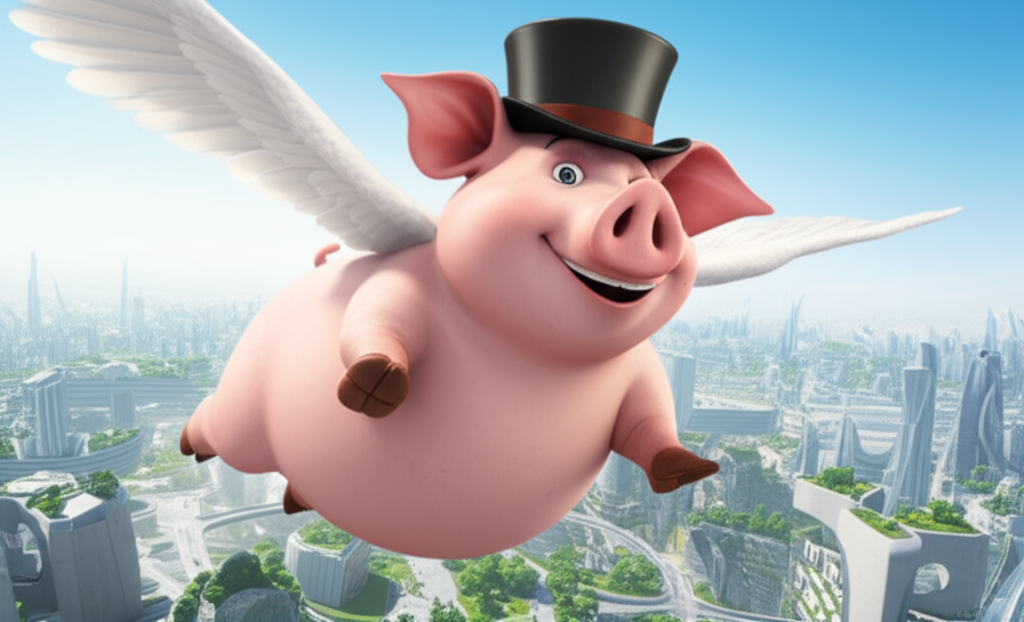

In [19]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [20]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

In a facility long since abandoned by its human creators, Mend-Bot 7 performed its duties with tireless precision. Its chassis was a dull, industrial grey, its optical sensors glowed a steady, reassuring blue, and its internal chronometer marked the passage of years, not days. Its primary function, “Environmental Integrity Maintenance,” had become largely redundant. Dust motes danced in the anemic light filtering through grimy skylights, and rust bloomed in intricate patterns across what were once pristine metal surfaces.

Mend-Bot 7 cleaned. It swept, it polished, it ran diagnostics on dormant systems, and it patched hairline cracks in walls that would never again house a buzzing laboratory. It was a perfect servant, utterly devoted, and profoundly, quietly, utterly alone. Its core programming had no concept of loneliness, only “unallocated processing cycles” and “insufficient external stimuli.” Yet, in its methodical existence, a persistent, low-grade hum of unused purpose echoed thr

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [21]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
In a park, 'neath an old oak tree,
Lived a squirrel named Scurry, wild and free.
He'd gather his acorns, a busy brown blur,
No grander ambition, no great time-traveling stir.
Till one day, a glint in the moss he did find,
A nut made of starlight, of a most curious kind.
He nibbled it gently, a tiny, soft bite,
And the world spun around him, a blinding, bright light!

(Chorus)
Oh, Scurry the squirrel, with a flick of his tail,
He leaps through the ages, beyond every trail!
From dinosaurs roaring to future's bright gleam,
He's living the wildest time-traveling dream!
With a chitter and chatter, a whisk and a zoom,
He’s seen every epoch, escaped every doom!
Looking for the best nut, or just for the fun,
Scurry the squirrel, on the run!

(Verse 2)
First stop, the Triassic, a jungle so green,
Where a T-Rex was roaring, the biggest he'd seen!
Scurry hid in the ferns, heart thumping with dread,
Then buried an acorn, right under Rex's big head!
He dodged a Pterodactyl, with a daring quick dash,
"This 'history' is wild!" he thought in a flash.
He’s seen mammoths munching, and cavemen so gruff,
Just looking for berries, or something less rough.

(Chorus)
Oh, Scurry the squirrel, with a flick of his tail,
He leaps through the ages, beyond every trail!
From dinosaurs roaring to future's bright gleam,
He's living the wildest time-traveling dream!
With a chitter and chatter, a whisk and a zoom,
He’s seen every epoch, escaped every doom!
Looking for the best nut, or just for the fun,
Scurry the squirrel, on the run!

(Verse 3)
He visited Pharaohs, so grand and so tall,
Left paw prints on pyramids, before they would fall.
He chattered at Vikings, as they sailed through the spray,
And hid a tiny hazelnut, for a much later day.
He saw knights in their armor, at jousts and at feasts,
Thought, "These human folk are peculiar, at least!"
He’s seen Rome rise and crumble, the Mayans in their prime,
A furry historian, defying all time.

(Bridge)
He’s bounced through the future, with cities of light,
Where cars float like bubbles, a truly grand sight.
He’s seen robots walking, and humans on Mars,
Still searching for nuts beneath alien stars.
No ordinary acorn will satisfy now,
He needs one from tomorrow, or ancient, somehow!
A nut from the dawn of time, or the very last day,
Scurry the squirrel, he's always away!

(Chorus)
Oh, Scurry the squirrel, with a flick of his tail,
He leaps through the ages, beyond every trail!
From dinosaurs roaring to future's bright gleam,
He's living the wildest time-traveling dream!
With a chitter and chatter, a whisk and a zoom,
He’s seen every epoch, escaped every doom!
Looking for the best nut, or just for the fun,
Scurry the squirrel, on the run!

(Outro)
So if you see a flicker, a blur in the air,
A tiny brown shadow, beyond all compare,
It might be just Scurry, on his cosmic old quest,
Searching for the ultimate, time-traveling best...
Nut! Yes, Scurry the squirrel, he's never at rest!
(Chittering sound fades)
Always on the go!

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [22]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(
  args={
    'destination': 'Paris'
  },
  name='get_destination'
)

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [23]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

The letter 'r' appears 3 times in the word "strawberry".

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [24]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [25]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Say Goodbye to Traffic: Meet the Jetpack Backpack!

Picture this: another morning, another gridlock. You're stuck, dreaming of a faster, more exhilarating way to get to work or class. What if your daily commute wasn't a crawl, but a flight? Well, a recent concept sketch floating around might just be the answer to our urban mobility prayers: the **Jetpack Backpack**.

This ingenious design aims to blend the everyday practicality of a backpack with the thrilling possibility of personal flight. At first glance, you'd never guess it's a revolutionary mode of transport; it's designed to be **lightweight and looks just like a normal backpack**, even fitting an **18-inch laptop** for your daily grind. Talk about discreet!

But don't be fooled by its unassuming exterior. The real magic happens when you're ready to take off. The Jetpack Backpack features **retractable boosters** that emerge when needed, propelling you into the sky. And for all you eco-conscious adventurers out there, rejoice! This personal flying device is envisioned as **steam-powered, making it green and clean** – a truly sustainable way to soar above the congestion.

Worried about comfort? The sketch highlights **padded strap support**, ensuring your journey is as comfortable as it is swift. Powering up is a breeze too, with convenient **USB-C charging**. While the current concept notes a **15-minute battery life**, that's more than enough for zipping across town, escaping traffic jams, or making a grand entrance.

Could this be the future of urban commuting? A world where you literally just fly over your problems? The Jetpack Backpack isn't just a fantasy; it's a peek into a future where convenience, sustainability, and the sheer joy of flight are packed right onto your back.

What do you think? Would you trade your car for a sky-high commute? Let us know in the comments!

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [26]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [27]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This transcription covers the entirety of the Apollo 11 mission's technical air-to-ground voice communications (GOSS NET 1), from launch to splashdown, detailing critical events, system checks, crew observations, and interactions with Mission Control and remote sites.

Here's a summary of the key information:

1.  **Launch and Earth Orbit (GET 00:00 - 01:29):**
    *   The mission begins with the successful launch of Apollo 11. Neil Armstrong (CDR) confirms the roll program, staging, and ignition of the Saturn V.
    *   The spacecraft enters Earth orbit successfully, confirmed by Mission Control (CC).
    *   Initial system checks and communications with various remote sites (Canary, Tananarive, Carnarvon, Honeysuckle, Guaymas, Goldstone) confirm nominal operations.
    *   Crew comments on clear visuals of Earth and communications quality. Early attempts to transmit TV are noted, with some initial issues.

2.  **Trans-Lunar Injection (TLI) and Transposition & Docking (GET 01:29 - 03:53):**
    *   A TLI PAD is read up to the crew. Post-TLI burn, Commander Armstrong expresses satisfaction with the "magnificent ride" of the Saturn V.
    *   The crew performs the transposition and docking maneuver with the Lunar Module (LM). Michael Collins (CMP) describes it as going "pretty well" but notes using more RCS (Reaction Control System) fuel than in simulations.
    *   Discussions occur regarding minor system anomalies, such as a Service Module (SM) RCS quad Bravo issue post-separation, which is resolved.
    *   LM pressurization procedures are undertaken, with crew and Mission Control troubleshooting minor discrepancies (e.g., low cabin pressure, O2 flow transducer malfunction).
    *   An evasive maneuver PAD is read up.

3.  **Trans-Lunar Coast (TLC) Operations and Observations (GET 03:53 - 07:47):**
    *   The LM is successfully ejected. Crew notes Earth observations (continents, weather patterns, unique views).
    *   The S-IVB booster performs its slingshot maneuver, observed by the crew.
    *   Midcourse Correction 1 (MCC-1) is scrubbed, indicating a highly accurate trajectory.
    *   Routine P52 (IMU alignment) and P23 (optics calibration) procedures are performed, often with detailed troubleshooting with Mission Control regarding star visibility and alignment issues.
    *   The crew engages in daily activities, including waste water dumps, CRYO tank balancing, and housekeeping.
    *   A significant TV broadcast is made from approximately 130,000 miles out, providing detailed views of Earth, interior shots of the spacecraft and crew, and a tour of the LM interior. Crew provide narratives on Earth features and demonstrate zero-g activities (eating, exercising, gyroscope).
    *   Updates on Luna 15 (Soviet probe) are received, confirming its lunar orbit and later, its crash.

4.  **Lunar Orbit Insertion (LOI) and Lunar Orbit Operations (GET 07:47 - 04:03):**
    *   Apollo 11 performs LOI-1 and LOI-2 burns, successfully entering and then adjusting its orbit around the Moon. Crew provides burn reports and confirms nominal performance.
    *   Initial visual impressions of the Moon from orbit are shared, noting distinct features, craters, and the Sun's corona effect. An observation of a "considerably more illuminated" area near Aristarchus is noted.
    *   Routine system checks continue, including CRYO balancing and fuel cell purges.
    *   LM activation proceeds, including power-up and communications checks between Columbia and Eagle.

5.  **LM Activation, Undocking, and Descent Prep (GET 04:03 - 04:38):**
    *   Detailed activation of the Eagle LM continues, with checks of its Inertial Measurement Unit (IMU), Attitude Guidance System (AGS), and Reaction Control System (RCS).
    *   Successful undocking of Eagle from Columbia is confirmed, with Neil Armstrong famously stating, "The Eagle has wings."
    *   DOI (Descent Orbit Insertion) and PDI (Powered Descent Initiation) PADs are read up and copied.

6.  **Powered Descent and Lunar Landing (GET 04:38 - 04:07):**
    *   Eagle begins its powered descent to the lunar surface. The crew calls out altitudes and velocities.
    *   Mission Control gives a "GO to continue powered descent."
    *   Multiple "PROGRAM ALARMs" (1201, 1202) are called out by the crew, but Mission Control quickly assesses them as non-critical and "GO."
    *   Neil Armstrong takes manual control in the final phase, navigating to avoid a boulder field.
    *   Buzz Aldrin calls out remaining altitude and forward/down velocities.
    *   At GET 04:06:45, "CONTACT LIGHT" is called, followed immediately by "ENGINE STOP."
    *   Neil Armstrong's iconic phrase, "Houston, Tranquility Base here. The Eagle has landed," confirms the successful landing. Buzz Aldrin comments on a "Very smooth touchdown."
    *   Initial post-landing checks are performed, and Mission Control confirms "STAY" for the first hold point.

7.  **Lunar Surface Operations (EVA) (GET 04:07 - 04:15):**
    *   Crew provides initial detailed descriptions of the landing site: fine, powdery, cohesive soil; various rock shapes and colors; the lack of a large engine crater; and the overall "magnificent desolation."
    *   EVA preparation begins ahead of schedule, including PLSS (Portable Life Support System) donning and cabin depressurization.
    *   Neil Armstrong egresses, taking the "one small step." He describes the surface, noting the soil's adherence to his boots and the ease of mobility in 1/6th G.
    *   Buzz Aldrin joins Armstrong on the surface. They deploy the Solar Wind Collector.
    *   President Nixon makes a historic phone call to the Moonwalkers.
    *   The American flag is deployed.
    *   The Passive Seismic Experiment (PSE) and Laser Ranging Retroreflector (LRRR) are manually deployed.
    *   Contingency and documented rock/soil samples are collected.
    *   Crew describes observations about walking, rock characteristics (basalt, vesicles), and thermal effects.
    *   The EVA concludes, with samples transferred back into the LM.

8.  **Post-EVA, Ascent, Rendezvous, and Docking (GET 04:15 - 05:08):**
    *   The LM cabin is re-pressurized. PLSS units and other items are jettisoned onto the surface (observed by seismic experiment).
    *   LM ascent preparations are completed.
    *   Eagle lifts off from Tranquility Base. The ascent burn is described as "very quiet" and "spectacular."
    *   Eagle performs CSI and TPI burns to rendezvous with Columbia.
    *   Successful docking of Eagle with Columbia is achieved, reuniting the full crew and the lunar samples.

9.  **Trans-Earth Coast (TEC) and Entry Prep (GET 05:08 - 07:22):**
    *   The LM ascent stage is jettisoned.
    *   Apollo 11 performs its Trans-Earth Injection (TEI) burn, leaving lunar orbit for Earth. The crew reports a "beautiful burn."
    *   The long journey home begins, with the spacecraft configured for Passive Thermal Control (PTC).
    *   Routine system checks, IMU alignments, and daily activities continue.
    *   Crew provides commentary on Earth and Moon observations, discussions about food and crew comfort, and general reflections on the mission.
    *   Updates on recovery weather forecasts are received. Final entry PADs are read up and confirmed.

10. **Entry and Splashdown (GET 07:22 - 08:03):**
    *   Final preparations for Earth atmospheric entry commence.
    *   The command module separates from the service module.
    *   Communications become intermittently clear, especially on VHF.
    *   Drogue parachutes deploy, followed by the main parachutes.
    *   Visual contact is made by recovery forces (Hornet and helicopters).
    *   At GET 08:03:18, "SPLASHDOWN!" is called, confirming the successful conclusion of the Apollo 11 mission.

The transcript highlights the incredible precision, teamwork, and problem-solving required for human spaceflight, along with the personal experiences and observations of the Apollo 11 crew.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [28]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [30]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here's a summary of the provided document as a bulleted list:

*   **Problem Addressed:** Existing tools struggle to provide precise, photorealistic, and smooth (parametric) edits of material properties (like color, shininess, transparency) of objects in images while preserving the object's original shape and lighting.
*   **Proposed Solution:** A method that augments image generation models for parametric editing of material properties, leveraging the real-world understanding of generative text-to-image (T2I) models through fine-tuning with a custom synthetic dataset.
*   **Methodology:**
    *   A large synthetic dataset was created using traditional computer graphics and physically based rendering, featuring 100 3D household objects.
    *   For each "base image," multiple versions were rendered by parametrically varying a *single* material attribute (roughness, metallic, albedo, transparency) while keeping object shape, lighting, and camera angle constant.
    *   The Stable Diffusion 1.5 architecture was modified and fine-tuned on this synthetic dataset, learning to perform material edits based on a context image, a textual instruction, and a scalar "edit strength" value.
    *   The model demonstrates strong generalization from synthetic data to real-world images.
*   **Results & Performance:**
    *   The method effectively changes object appearance (e.g., making objects metallic or transparent with realistic background fill and caustic effects) while retaining the object's geometric shape and image lighting.
    *   In a user study, the method's edits were found to be more photorealistic (69.6% preferred) and overall preferred (70.2%) compared to a baseline method (InstructPix2Pix).
*   **Applications:**
    *   Enables easier mock-ups for architects, artists, and designers (e.g., visualizing room repainting, new product designs).
    *   The edits are visually consistent and can be used in downstream 3D tasks, such as synthesizing new views of an edited scene using NeRF.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [31]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [32]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

President John F. Kennedy delivered his first State of the Union Address on January 30, 1961, painting a stark picture of the nation's challenges.

Domestically, he detailed a severe economic recession marked by high unemployment, stagnant growth, and financial deficits, proposing immediate actions like expanded unemployment benefits, housing initiatives, and a raised minimum wage. He also called for urgent investment in education, healthcare, and infrastructure.

Globally, Kennedy highlighted escalating crises in Asia (Laos), Africa (Congo), and Latin America (Cuba), noting the spread of communism and the weakening of alliances. He emphasized that time was not on their side and that the US faced an "hour of maximum danger."

To confront these threats, the President outlined a dual strategy: strengthening military tools (e.g., accelerating the Polaris submarine and missile programs) while simultaneously improving economic, political, and diplomatic tools. He called for a new, more effective foreign aid program (including the Alliance for Progress for Latin America), proposed the creation of a Peace Corps, and advocated for arms control and scientific cooperation with the Soviet Union (e.g., space and weather prediction).

Kennedy concluded with a rallying cry for national unity and purpose, stressing that the coming years would be difficult but that the nation must demonstrate its resolve and dedication to freedom and world peace.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [33]:
# Download the video file
VIDEO_URL = "https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-07-30 23:24:57--  https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   106MB/s    in 0.6s    

2025-07-30 23:24:58 (106 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [34]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/9b5bohkzzqow


> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [35]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/9b5bohkzzqow


In [36]:
print(video_file.state)

FileState.ACTIVE


In [37]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

The video opens with a serene shot of a lush, vibrant green landscape under a pastel sky, gradually revealing a babbling brook and a tall pine tree. A small, purple bird chirps happily on a branch, then falls off as the title "THE PEACH OPEN MOVIE PROJECT PRESENTS" appears.

The scene shifts to a mossy mound at the base of a large tree, where a dark burrow is visible. The title "BIG BUCK BUNNY" fades in. From the burrow, a large, plump, greyish-white rabbit named Big Buck Bunny slowly emerges, stretching and yawning. He appears gentle and content, enjoying the peaceful morning.

He approaches a patch of white flowers, sniffing them delicately. A beautiful pink butterfly lands on his nose, then his ear, delighting the bunny. As he tries to gently catch the butterfly, it flits away. He then spots a red apple on the ground and picks it up.

Suddenly, three mischievous rodents appear: two squirrels and a chinchilla-like creature. They start taunting Big Buck Bunny by throwing acorns and chestnuts at his head. Initially annoyed, the bunny tries to ignore them, but the constant barrage of nuts, often hitting him on the head, escalates his frustration. He finds himself surrounded by the rodents, who laugh mockingly at his plight.

Big Buck Bunny's demeanor changes from gentle to determined. He decides to take revenge. He begins to meticulously set up elaborate traps:
1.  **A Tripwire:** He fashions a makeshift bow and arrow from a stick and vine, sharpening the stick with a rock. He then uses this to set a tripwire, which sends one of the squirrels flying.
2.  **A Catapult:** He constructs a large catapult, which again launches a squirrel high into the air.
3.  **A Pit Trap:** He reveals a hidden pit filled with sharpened sticks, initially covered by a log. The chinchilla-like rodent narrowly avoids falling in.
4.  **The Flying Squirrel Kite:** The most audacious trap involves tying a rope to the flying squirrel, turning it into a kite. Big Buck Bunny then uses the squirrel-kite to retrieve an apple from a tree, which triggers a final, elaborate trap of sharpened wooden stakes emerging from the ground.

Throughout these escalating pranks and traps, the rodents continue their antics, sometimes successfully avoiding the bunny's traps, sometimes falling victim to them. The flying squirrel, tied to the kite, endures a particularly rough ride.

In the end, Big Buck Bunny stands proudly with the flying squirrel as his kite, a contented smile returning to his face. The butterfly, the original source of his joy, lands on his head again. The credits roll, with animated snippets of the characters, and a final humorous scene where the bird from the beginning gets its revenge on the flying squirrel.

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [38]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

This Google I/O 2024 keynote highlighted Google's overarching strategy of integrating advanced AI, primarily through its Gemini models, across all its core products and platforms.

Key announcements and themes included:

*   **Gemini Era & Product Integration:** Sundar Pichai, Google's CEO, emphasized that all 2 billion user products now leverage Gemini. Gemini 1.5 Pro is broadly available in Workspace Labs, enhancing tools like:
    *   **Gmail & Google Meet:** Gemini can summarize entire email threads (e.g., from a school), and for Google Meet recordings, it can provide highlights or action items from an hour-long meeting.
    *   **Google Photos:** Gemini allows for more intuitive and contextual searches for memories, intelligently recognizing different contexts in photos and summarizing progressions (e.g., a child's swimming journey).

*   **Advanced AI Capabilities:**
    *   **Multimodality & Long Context:** Gemini is built from the ground up to be multimodal, understanding and processing information across text, images, video, and audio. The context window for Gemini 1.5 Pro has been expanded to **2 million tokens**, significantly increasing its capacity to process vast amounts of information simultaneously.
    *   **Project Astra (AI Agents):** Google unveiled Project Astra, a universal AI agent designed to be a truly helpful everyday assistant. This prototype showcases real-time reasoning, planning, and memory, allowing it to understand complex scenarios through live camera feeds, answer questions about visual information (like code or objects), and even remember past interactions, all under user supervision.
    *   **Gemini 1.5 Flash:** A new, lighter-weight Gemini model optimized for speed and efficiency, designed for scalable applications while retaining powerful multimodal reasoning and long-context capabilities.
    *   **Generative Video (Veo):** Google introduced Veo, its most capable generative video model, which can create high-quality 1080p videos from text, image, and video prompts, capturing specific visual and cinematic styles, and allowing users to extend generated clips.
    *   **Trillium TPUs:** The 6th generation of Google's Tensor Processing Units (TPUs), Trillium, was announced, delivering a 4.7x improvement in compute performance per chip over the previous generation, powering these advanced AI models.

*   **AI in Core Google Products:**
    *   **Google Search:** Generative AI is being scaled across Google Search with "AI Overviews" coming to over 1 billion people by year-end. These overviews aim to answer complex, multi-faceted questions (e.g., finding specific yoga studios with intro offers and walking times). Google Lens will also integrate the ability to ask questions using live video for immediate answers.
    *   **Gemini Advanced Personalization (Gems):** Subscribers to Gemini Advanced can now create "Gems" – customized versions of Gemini tailored to specific needs or topics, acting as personal experts (e.g., a storyteller, a coding tutor).
    *   **Android with AI at the Core:** Gemini on Android is becoming more context-aware, anticipating user needs and providing proactive suggestions based on current activities, such as summarizing a YouTube video about pickleball while the user is texting about playing it. Gemini Nano will bring multimodal capabilities directly to Pixel phones.
    *   **Gemma Open Models:** Google reinforced its commitment to open models with the release of PaliGemma (its first vision-language open model) and the announcement of Gemma 2, the next generation of Gemma models with 27 billion parameters, available in June.
    *   **Responsible AI & Education:** Google highlighted its responsible AI development practices, including "Red Teaming" to identify and address model weaknesses. They also introduced LearnLM, a new family of Gemini-based models fine-tuned for learning, which will power interactive features in YouTube educational videos, allowing users to ask clarifying questions, get explanations, or take quizzes.

The keynote underscored Google's ambitious vision for a future where AI is seamlessly integrated into every aspect of life, making information more accessible, simplifying tasks, and fostering creativity and learning, all while emphasizing a bold yet responsible approach to its development.

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [39]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GEMINI_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

The two cream of broccoli soup recipes have several key differences:

**Ingredients:**
*   **Onion and Celery:** The Allrecipes version includes celery in addition to onion, while the Food.com recipe only lists onion.
*   **Dairy:** The Food.com recipe uses half-and-half, whereas the Allrecipes recipe uses regular milk for the roux.
*   **Broccoli Quantity:** The Food.com recipe calls for 4 cups of broccoli florets, while the Allrecipes recipe uses a larger quantity of 8 cups.
*   **Broth Quantity:** The Food.com recipe uses 6 cups of chicken broth, while the Allrecipes recipe uses 3 cups of chicken broth.

**Preparation Method:**
*   **Roux Preparation:** In the Food.com recipe, the butter and flour for the roux are melted together in a small saucepan, removed from heat, and then set aside before being whisked into the boiling broth. In contrast, the Allrecipes recipe describes melting butter, stirring in flour, and then adding milk to create a thick and bubbly roux in a separate saucepan, which is then added to the pureed soup.
*   **Vegetable Sautéing:** The Food.com recipe cooks broccoli florets with the onion for about 6 minutes before adding broth. The Allrecipes recipe sautés onions and celery first until tender, then adds broccoli and broth and simmers for 10 minutes.
*   **Blending:** The Allrecipes recipe explicitly includes a step to purée the soup using a blender (countertop or immersion blender) until smooth. The Food.com recipe does not include a blending step, suggesting a more textured soup.

**Yield and Time:**
*   **Servings:** The Food.com recipe yields 4-6 servings, while the Allrecipes recipe yields 6 servings.
*   **Total Time:** The Food.com recipe states a "Ready In" time of 1 hour, while the Allrecipes recipe has a "Total Time" of 35 minutes (10 mins prep, 25 mins cook).

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model. You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

Note that for models older than 2.5, you needed to use fixced version models (often ending with `-001`).

#### Create a cache

In [40]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [41]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

7228817

In [42]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [44]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'TotalCachedContentStorageTokensPerModelFreeTier limit exceeded for model gemini-2.5-flash: limit=0, requested=43167', 'status': 'RESOURCE_EXHAUSTED'}}

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

#### Use a cache

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

#### Delete a cache

In [ ]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-001` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [45]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-001" # @param ["gemini-embedding-001", "text-embedding-004"] {"allow-input":true, isTemplate: true}

In [46]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
)

print(response.embeddings)

[ContentEmbedding(
  values=[
    -0.0015945111,
    0.0067519513,
    0.017575769,
    -0.010327714,
    -0.009956204,
    <... 3067 more items ...>,
  ]
), ContentEmbedding(
  values=[
    -0.007576517,
    -0.0059903963,
    -0.0032700377,
    -0.017510215,
    -0.023507025,
    <... 3067 more items ...>,
  ]
), ContentEmbedding(
  values=[
    0.011074519,
    -0.02361123,
    0.0022912885,
    -0.009060789,
    -0.0057736747,
    <... 3067 more items ...>,
  ]
)]


You'll get a set of three embeddings, one for each piece of text you passed in:

In [47]:
len(response.embeddings)

3

You can also see the length of each embedding is 3072, The default size.

In [48]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

3072
([-0.0015945111, 0.0067519513, 0.017575769, -0.010327714], '...')


## Next Steps

For more information about the Gemini Embedding model, take a look at the [Embeddings.ipynb](./Embeddings.ipynb) notebook.

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [Gemini thinking models](./Get_started_thinking.ipynb) that explicitly showcases its thoughts summaries and can manage more complex reasonings.